<a href="https://colab.research.google.com/github/OdysseusPolymetis/colabs_for_nlp/blob/main/4_exemples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install stanza==1.4.0

     |████████████████████████████████| 574 kB 9.8 MB/s 
     |████████████████████████████████| 175 kB 72.2 MB/s 
     |████████████████████████████████| 4.0 MB 60.0 MB/s 
     |████████████████████████████████| 880 kB 54.7 MB/s 
     |████████████████████████████████| 6.6 MB 57.6 MB/s 
     |████████████████████████████████| 596 kB 60.5 MB/s 
     |████████████████████████████████| 77 kB 8.3 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=1859d54aaaad6a6344eff334573ccb39313beae7176607702c3f4e6731e5456e
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=774c9f85b7a5e8ff6860124d9bf0f809a7c1aac8a267328b1ffe39a78bc80010
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built emoji sacremoses
  Attempting uninstall: pyyaml
    Fou

In [ ]:
import pickle

In [ ]:
import stanza
stanza.download('fr')

2022-05-09 14:37:06 INFO: Downloading default packages for language: fr (French)...


2022-05-09 14:37:19 INFO: Finished downloading models and saved to /root/stanza_resources.


In [ ]:
nlp_stanza = stanza.Pipeline(lang='fr', processors='tokenize,mwt,pos,lemma,ner')

2022-05-09 14:37:30 INFO: Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| ner       | wikiner |

2022-05-09 14:37:30 INFO: Use device: gpu
2022-05-09 14:37:30 INFO: Loading: tokenize
2022-05-09 14:37:40 INFO: Loading: mwt
2022-05-09 14:37:40 INFO: Loading: pos
2022-05-09 14:37:41 INFO: Loading: lemma
2022-05-09 14:37:41 INFO: Loading: ner
2022-05-09 14:37:42 INFO: Done loading processors!


In [ ]:
!gdown --id 1GEgd5cQoJkTm5PRWfixxOKHe3uOlxFqo

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1GEgd5cQoJkTm5PRWfixxOKHe3uOlxFqo
To: /content/miserables.txt
100% 3.17M/3.17M [00:00<00:00, 235MB/s]


In [ ]:
filepath_of_text = "/content/miserables.txt"

In [ ]:
full_text = open(filepath_of_text, encoding="utf-8").read()

In [ ]:
miserables_stanza=nlp_stanza(full_text)

In [ ]:
pick_insert = open('/content/drive/MyDrive/Colab_Notebooks/enexdi/dumped/nlp_stanza3.pickle','wb')
pickle.dump(miserables_stanza, pick_insert)
pick_insert.close()

In [ ]:
# Si jamais vous n'avez pas envie de faire tourner le nlp de stanza, exécutez cette cellule.
pick_read = open('/content/drive/MyDrive/Colab_Notebooks/enexdi/dumped/nlp_stanza3.pickle','rb')
miserables_stanza = pickle.load(pick_read)
pick_read.close()

In [ ]:
lemmas = [token.lemma for sent in miserables_stanza.sentences for token in sent.words]

In [ ]:
print(len(lemmas))

649395


In [ ]:
print(lemmas[20:40])

['évêque', 'de', 'Digne', '.', 'ce', 'être', 'un', 'vieillard', 'de', 'environ', 'soixante-quinze', 'an', ';', 'il', 'occuper', 'le', 'siège', 'de', 'Digne', 'depuis']


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopset = set(stopwords.words('french'))
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
hugo_text = nltk.Text(lemmas)

In [ ]:
print(type(hugo_text))

<class 'nltk.text.Text'>


In [ ]:
hugo_text.concordance("valjean")

Displaying 25 of 1099 matches:
il dire son nom? il il appeler Jean Valjean . maintenant vouloir il que il il d
ut : -- voici . il lui appeler Jean Valjean . il être un galérien . il avoir pa
oir mettre sur le passeport: « Jean Valjean , forçat libérer , natif de ... -- 
 avoir ajouter : « -- monsieur Jean Valjean , ce être à Pontarlier que il aller
Pontarlier , où il aller , monsieur Valjean , un industrie toute patriarcal et 
 que ce homme , qui se appeler Jean Valjean , ne avoir que trop son misère prés
r , et il avoir souper avec ce Jean Valjean de le même air et de le même façon 
 le petit maison . chapitre VI Jean Valjean vers le milieu de le nuit , Jean Va
an vers le milieu de le nuit , Jean Valjean se réveiller . Jean Valjean être de
 , Jean Valjean se réveiller . Jean Valjean être de un pauvre famille de paysan
 Mathieu ; son père se appeler Jean Valjean , ou Vlajean , sobriquet probableme
 contraction de _Voilà Jean_ . Jean Valjean être de un caractère pensif sans êt
en appare

In [ ]:
bcf = BigramCollocationFinder.from_words(lemmas)
filter_stops = lambda w: len(w) < 3 or w in stopset
bcf.apply_word_filter(filter_stops)
bcf.nbest(BigramAssocMeasures.likelihood_ratio, 4)

[('Jean', 'Valjean'),
 ('quelque', 'chose'),
 ('madame', 'Magloire'),
 ('jeune', 'fille')]

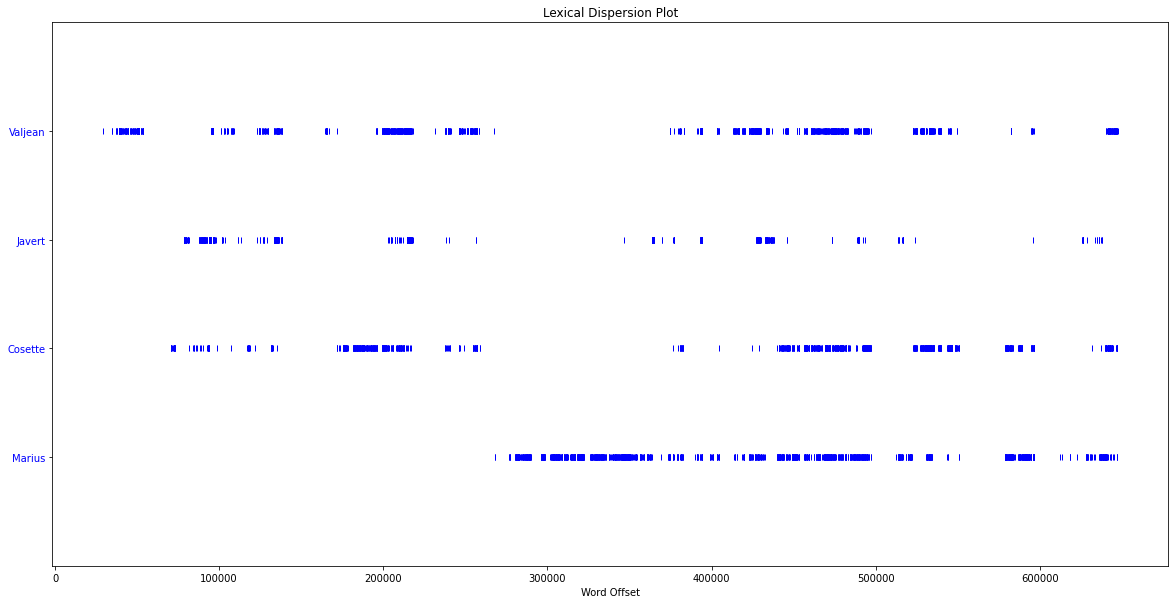

In [ ]:
plt.figure(figsize=(20, 10))
hugo_text.dispersion_plot(['Valjean', 'Javert', 'Cosette', 'Marius'])

In [ ]:
import pandas as pd

In [ ]:
def word_info_df(doc):
    """
    - Parameters: doc (a Stanza Document object)
    - Returns: A Pandas DataFrame object with one row for each token in
      doc, and columns for text, lemma, upos, and xpos.
    """
    rows = []
    for sentence in doc.sentences:
        for token, word in zip(sentence.tokens, sentence.words):
            row = {
                "text": word.text,
                "lemma": word.lemma,
                "upos": word.upos,
                "ent": token.ner
            }
            rows.append(row)
    return pd.DataFrame(rows)

In [ ]:
stanza_dataframe = word_info_df(miserables_stanza)

In [ ]:
headers = list(stanza_dataframe.columns)
print("voici les titres de colonnes : "+ str(headers))
print(stanza_dataframe)

voici les titres de colonnes : ['text', 'lemma', 'upos', 'ent']
              text       lemma   upos     ent
0           Victor      Victor  PROPN   B-PER
1             Hugo        Hugo  PROPN   E-PER
2              LES          le    DET  B-MISC
3       MISÉRABLES  MISÉRABLES  PROPN  E-MISC
4            Livre       livre   NOUN       O
...            ...         ...    ...     ...
639388       poste       poste   NOUN       O
639389          de          de    ADP       O
639390          l'          le    DET   B-ORG
639391  Imprimerie  imprimerie   NOUN   E-ORG
639392      royale       royal    ADJ       O

[639393 rows x 4 columns]


In [ ]:
from stanza.models.common.doc import StanzaObject
stanza_dataframe.to_csv('/content/drive/MyDrive/Colab_Notebooks/enexdi/dumped/miserables.csv', encoding='utf-8')

In [ ]:
stanza_dataframe['upos'].value_counts()

NOUN     109266
DET       89342
PUNCT     89304
VERB      74114
ADP       72562
PRON      71071
ADV       35390
ADJ       30015
AUX       23117
PROPN     20607
CCONJ     17562
SCONJ      9947
NUM        5531
INTJ       1107
X           416
SYM          44
Name: upos, dtype: int64

In [ ]:
stanza_dataframe['lemma'].value_counts()

le            57014
,             43812
de            32807
il            25471
.             23210
              ...  
assomption        1
crimes!           1
souillure         1
franchi           1
fourrière         1
Name: lemma, Length: 20159, dtype: int64

In [ ]:
tmp=stanza_dataframe['ent'].value_counts()[1:].to_frame()
print(tmp)

         ent
S-PER   9897
S-LOC   4382
B-PER   2652
E-PER   2652
B-MISC  2026
E-MISC  2026
S-MISC  2022
I-MISC  1382
E-LOC   1267
B-LOC   1267
I-LOC    766
I-PER    465
B-ORG     78
E-ORG     78
I-ORG     76
S-ORG     27


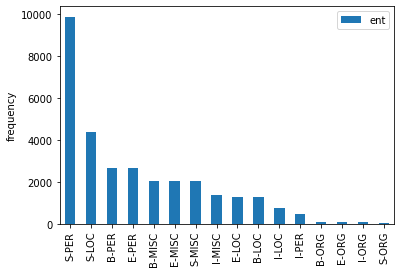

In [ ]:
fig,ax = plt.subplots()
tmp.plot(ax = ax, kind = 'bar', ylabel = 'frequency')
plt.show()

In [ ]:
tmp=stanza_dataframe['upos'].value_counts().to_frame()

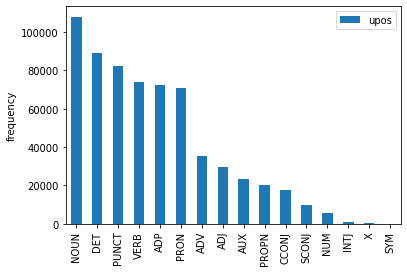

In [ ]:
fig,ax = plt.subplots()
tmp.plot(ax = ax, kind = 'bar', ylabel = 'frequency')
plt.show()